In [12]:
pip install matplotlib
pip install opencv-python

SyntaxError: invalid syntax (537070193.py, line 1)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### ①「milkdrop.bmp」を読込み、cv2.imshow()関数を用いて表示。

In [32]:
img_bgr = cv2.imread('milkdrop.bmp')
print(img_bgr)

[[[ 93  68  94]
  [150 150 146]
  [148 143 142]
  ...
  [ 23   8  37]
  [ 35  76  76]
  [ 62  68  65]]

 [[ 93  68  95]
  [151 150 146]
  [152 147 144]
  ...
  [ 25   9  37]
  [ 33  74  74]
  [ 62  68  66]]

 [[ 92  68  95]
  [149 150 146]
  [151 147 144]
  ...
  [ 24   7  37]
  [ 35  75  74]
  [ 61  68  65]]

 ...

 [[128  82 123]
  [180 178 166]
  [173 166 162]
  ...
  [ 24  10  38]
  [ 41  79  81]
  [ 80  89  88]]

 [[128  80 123]
  [174 188 167]
  [171 178 165]
  ...
  [ 12   0  33]
  [ 28  70  77]
  [ 69  77  80]]

 [[118  90 121]
  [205  88 146]
  [195  83 147]
  ...
  [112 107  94]
  [120 139 110]
  [137 141 115]]]


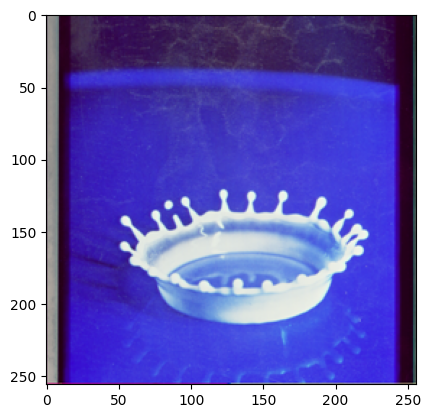

In [22]:
# RGBデータ列から画像を復元
plt.imshow(img_bgr) #imshowで画像の用意
plt.show() #showで画像を表示
# RGB(0,0,0)=黒、RGB(255,255,255) = 白
#　しかしデータがBGR値のため、RGBとして読み取ってしまっている現状では正しい色で表示されない。

In [23]:
x = np.array(img_bgr)
print(x.shape)
# 320 x 320 ピクセル、3=(RGB)

(256, 256, 3)


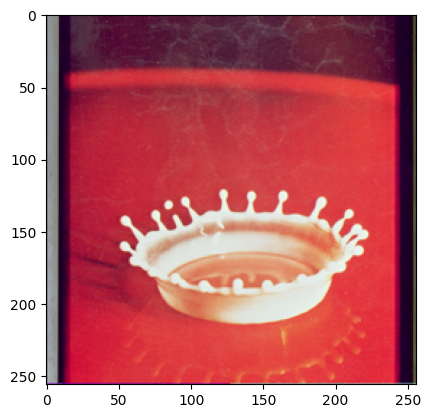

In [24]:
# GBR値をRGB値に正しく直す
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # BGRからRGBに変換する
plt.imshow(img_rgb);#画像情報の取得
plt.show() #表示

### ②白色領域（ミルククラウン）とそれ以外の2値画像を作成。

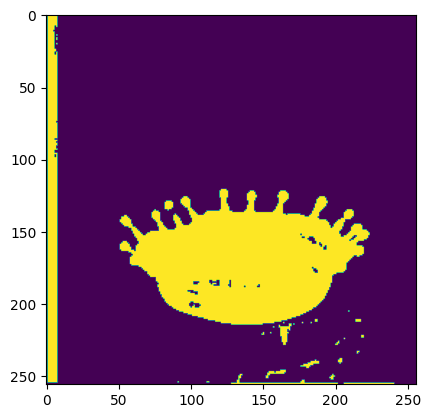

In [25]:
# ミルククラウンの最外郭を抽出するための閾値設定

import numpy as np

# 閾値
threshold_value = 135

# グレースケール変換
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    
# 方法2 （OpenCVで実装）      
ret, img_threshold = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)    

# 結果を出力
# cv2.imwrite("C:/github/sample/python/opencv/th.png", threshold_img)
plt.imshow(img_threshold)

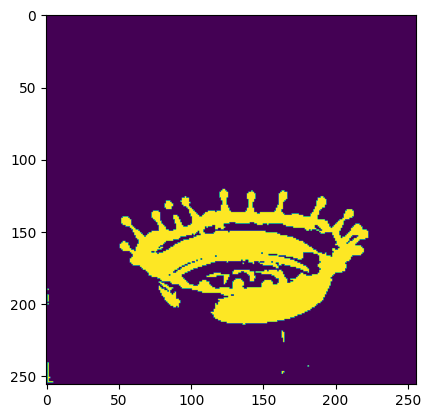

In [26]:
# ミルククラウンの離れた位置の部分を抽出できるフィルターを作成するため、閾値設定
# 閾値
threshold_milkdrop = 170

# グレースケール変換
gray_milkdrop = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    
# 方法2 （OpenCVで実装）      
ret, img_threshold_milkdrop = cv2.threshold(gray, threshold_milkdrop, 255, cv2.THRESH_BINARY)    

# 結果を出力
# cv2.imwrite("C:/github/sample/python/opencv/th.png", threshold_img)
plt.imshow(img_threshold_milkdrop)

In [27]:
# 輪郭の抽出
contours, hierarchy = cv2.findContours(img_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 最大エリアで輪郭抽出
largest_contour = max(contours, key=cv2.contourArea)

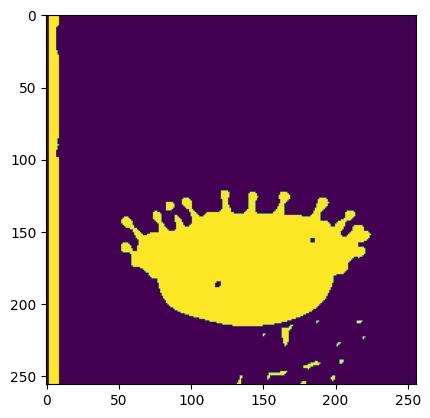

In [28]:
#二値データにモルフォロジー処理適応
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
opened = cv2.morphologyEx(img_threshold, cv2.MORPH_OPEN, kernel)

# Fill gaps in the milk crown
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

plt.imshow(opened)
plt.imshow(closed)

### ③作成した2値画像をもとに、白色領域（ミルククラウン）の輪郭を抽出。
画像左端白色領域や細かい白いノイズがある場合は、大きさ判定や座標による
抽出範囲の条件を加えてください。

In [29]:
# 作成済みの最大エリアを用いてモルフォ済み画像に適用。ミルククラウン部分のみ抽出。
contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 最大エリアで輪郭抽出
largest_contour = max(contours, key=cv2.contourArea)

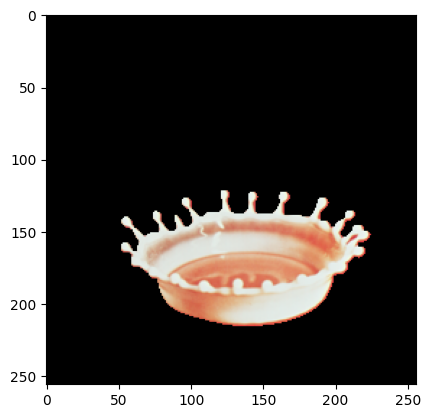

In [31]:
# ミルククラウンで二値マスク適用
mask = np.zeros(img_rgb.shape[:2], np.uint8)
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

#ミルククラウン抽出のために元データにマスク適用
milk_crown = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)


#結果を出力

plt.imshow(milk_crown)